In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [4]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [5]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [6]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [7]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [8]:
# Merge DataFrames on the common column "Mouse ID"
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display merged DataFrame
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Display the number of unique Mouse IDs in the merged DataFrame
num_unique_mice = merged_df['Mouse ID'].nunique()
print(f"Number of unique Mouse IDs: {num_unique_mice}")


Number of unique Mouse IDs: 249


In [10]:
# Check for mouse IDs with duplicate time points
duplicate_mouse_ids = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Display the Mouse IDs with duplicate time points
print("Mouse IDs with duplicate time points:", duplicate_mouse_ids)


Mouse IDs with duplicate time points: ['g989']


In [11]:
# Display the data associated with the first Mouse ID in duplicate_mouse_ids
duplicate_mouse_id = duplicate_mouse_ids[0]
duplicate_data = merged_df[merged_df['Mouse ID'] == duplicate_mouse_id]
print("Data associated with mouse ID with duplicate time points:")
print(duplicate_data)


Data associated with mouse ID with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920   

In [12]:
# Create a new DataFrame by removing data for the mouse ID with duplicate time points
cleaned_df = merged_df[merged_df['Mouse ID'] != duplicate_mouse_id]

# Verify the cleaned DataFrame
print("Cleaned DataFrame:")
print(cleaned_df.head())


Cleaned DataFrame:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [13]:
# Display the updated number of unique Mouse IDs in the cleaned DataFrame
num_unique_mice_updated = cleaned_df['Mouse ID'].nunique()
print(f"Updated number of unique Mouse IDs: {num_unique_mice_updated}")


Updated number of unique Mouse IDs: 248


In [14]:
# Import numpy to calculate the SEM
import numpy as np

# Group the cleaned DataFrame by "Drug Regimen"
grouped_df = cleaned_df.groupby('Drug Regimen')

# Calculate the required statistics for each drug regimen
summary_stats_df = grouped_df.agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

# Rename the columns for clarity
summary_stats_df.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary statistics DataFrame
print(summary_stats_df)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


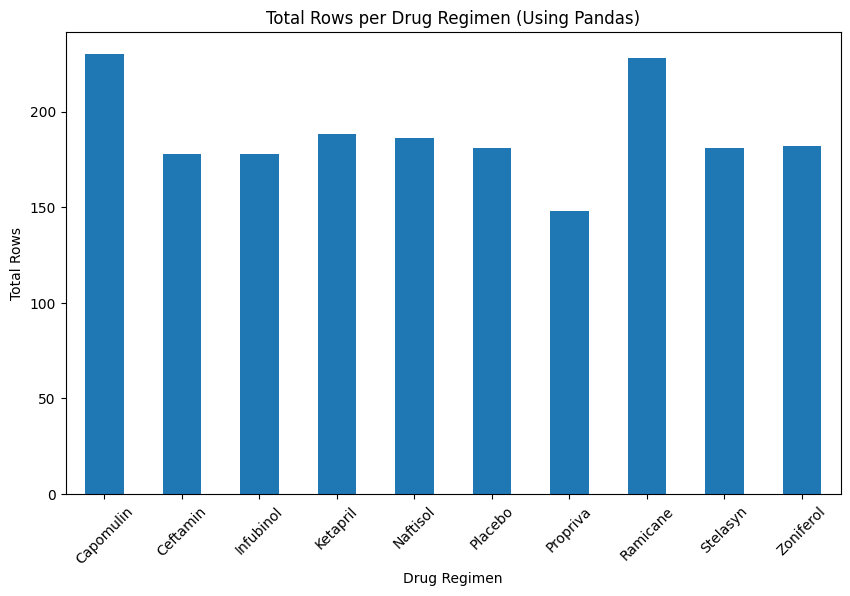

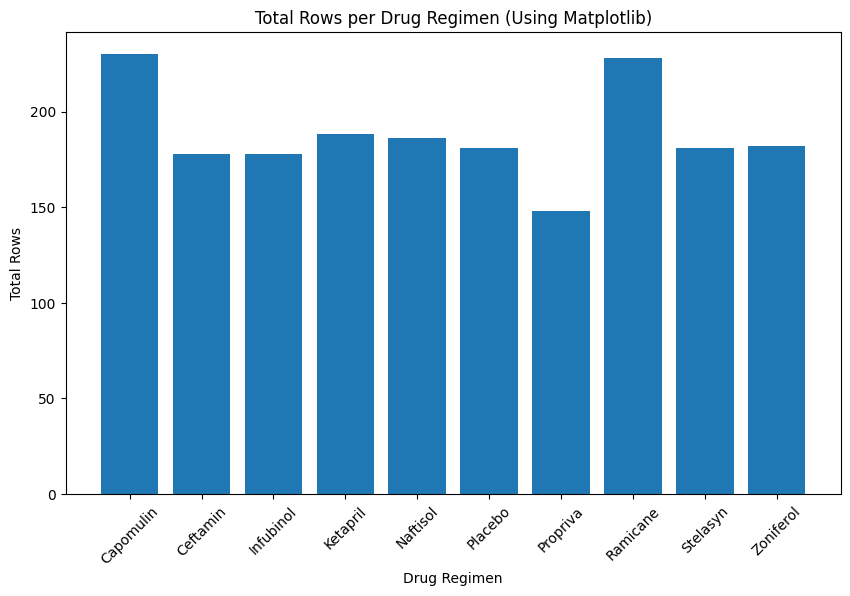

In [15]:
# Calculate the total number of rows for each drug regimen
total_rows_per_regimen = grouped_df['Mouse ID'].count()

# Create the first bar chart using Pandas DataFrame.plot()
total_rows_per_regimen.plot(kind='bar', figsize=(10, 6), ylabel='Total Rows', title='Total Rows per Drug Regimen (Using Pandas)')
plt.xticks(rotation=45)
plt.show()
# Extract the drug regimens and corresponding total rows from the grouped DataFrame
drug_regimens = total_rows_per_regimen.index
total_rows = total_rows_per_regimen.values

# Create the second bar chart using Matplotlib's pyplot methods
plt.figure(figsize=(10, 6))
plt.bar(drug_regimens, total_rows)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows')
plt.title('Total Rows per Drug Regimen (Using Matplotlib)')
plt.xticks(rotation=45)
plt.show()


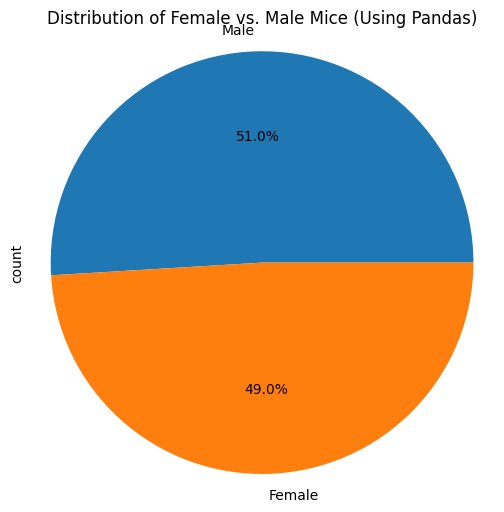

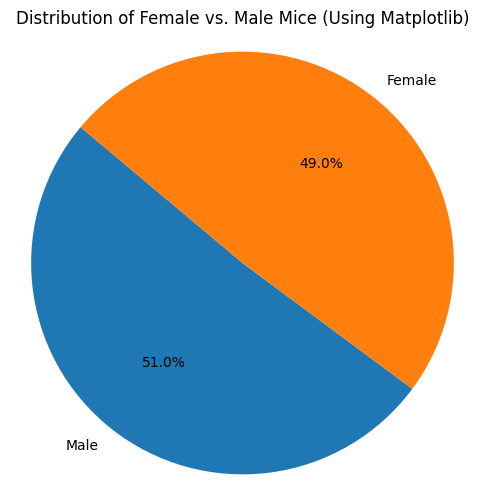

In [16]:
# Calculate the number of female and male mice in the cleaned DataFrame
gender_distribution = cleaned_df['Sex'].value_counts()

# Create the first pie chart using Pandas DataFrame.plot()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Distribution of Female vs. Male Mice (Using Pandas)')
plt.axis('equal')
plt.show()
# Extract the genders and corresponding counts from the gender_distribution Series
genders = gender_distribution.index
counts = gender_distribution.values

# Create the second pie chart using Matplotlib's pyplot methods
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=genders, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female vs. Male Mice (Using Matplotlib)')
plt.axis('equal')
plt.show()




In [17]:
# Group the cleaned DataFrame by "Mouse ID" and find the last (greatest) time point for each mouse
max_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the max_timepoint_df with the cleaned DataFrame to get the final tumor volume for each mouse
merged_max_timepoint_df = pd.merge(max_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

# Display the merged DataFrame to verify the results
print(merged_max_timepoint_df.head())
# List of treatment names
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to hold the final tumor volumes for each treatment
final_tumor_volumes = []
for drug in treatment_list:
    # Locate the rows corresponding to the current treatment in the merged DataFrame
    final_tumor_volume = merged_max_timepoint_df.loc[merged_max_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # Append the final tumor volumes to the list
    final_tumor_volumes.append(final_tumor_volume)

# Display the final tumor volumes for each treatment
print("Final tumor volumes for each treatment:")
for i, drug in enumerate(treatment_list):
    print(f"{drug}: {final_tumor_volumes[i].values}")
# Calculate the quartiles and IQR for each treatment
for i, drug in enumerate(treatment_list):
    quartiles = final_tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    # Determine potential outliers
    outliers = final_tumor_volumes[i][(final_tumor_volumes[i] < lower_bound) | (final_tumor_volumes[i] > upper_bound)]

    print(f"--- {drug} ---")
    print(f"Lower Quartile: {lower_q}")
    print(f"Upper Quartile: {upper_q}")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers.values}\n")


  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  
Final tumor volumes for each treatment:
Capomulin: [38.98287774 38.93963263 30.48598484 37.07402422 40.1592203  47.68596303
 37.31184577 38.1251644  38.75326548 41.48300765 38.84687569 28.43096411
 33.32909778 46.53920617 32.37735684 41.58152074 23.34359787 40.72857787
 34.45529799 31.02392294 40.65812366 39.95234669 36.04104

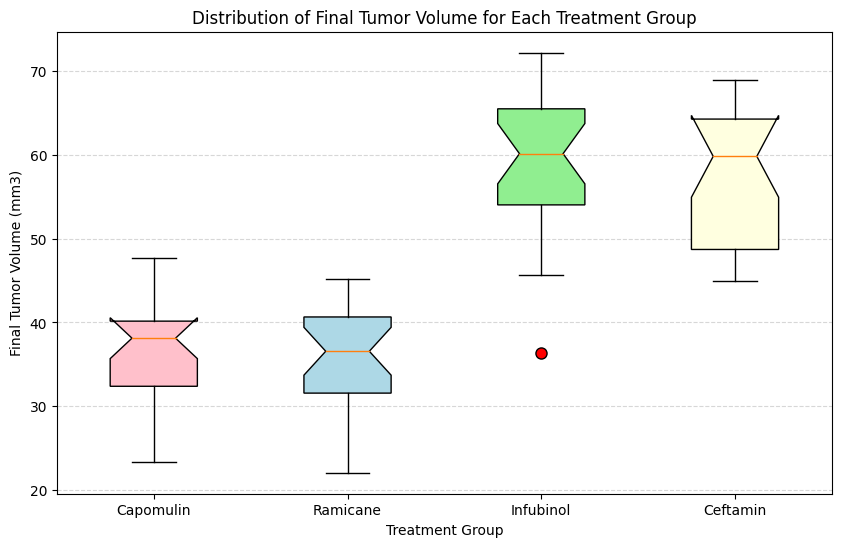

In [18]:
import matplotlib.pyplot as plt

# Data for the box plot (list of final tumor volumes for each treatment)
data_for_boxplot = [final_tumor_volumes[i].values for i in range(len(treatment_list))]

# Labels for the box plot
labels = treatment_list

# Create the box plot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(data_for_boxplot, labels=labels, patch_artist=True, notch=True)

# Customize box plot colors for each treatment group
colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Highlight potential outliers with a different color and style
outlier_marker = dict(markerfacecolor='red', marker='o', markersize=8)
for outlier in boxplot['fliers']:
    outlier.set(**outlier_marker)

# Add labels and title
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')

# Show the box plot
plt.grid(axis='y', linestyle='dashed', alpha=0.5)
plt.show()


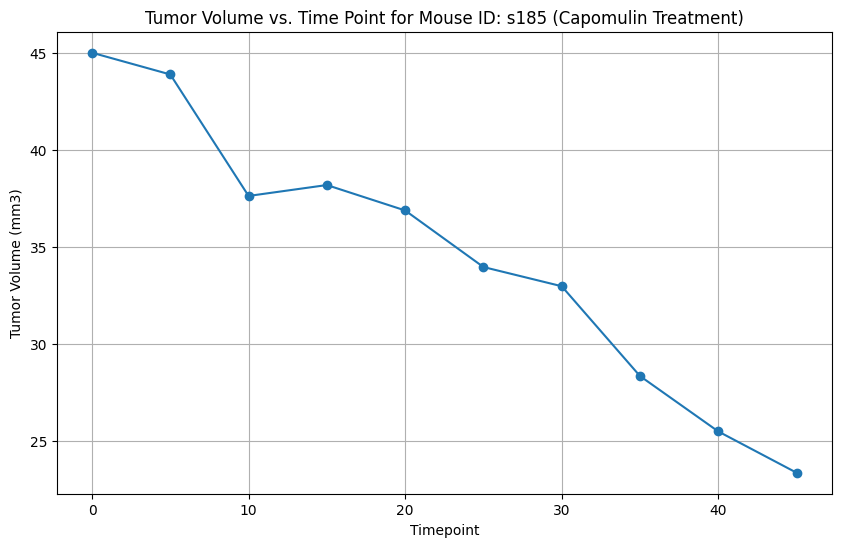

In [19]:
import matplotlib.pyplot as plt

# Step 1: Filter the cleaned DataFrame for Capomulin treatment
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Step 2: Select a single mouse that was treated with Capomulin
# For example, let's select the first mouse in the Capomulin DataFrame
selected_mouse = capomulin_df['Mouse ID'].iloc[0]

# Step 3: Create the line plot for the selected mouse
selected_mouse_data = capomulin_df[capomulin_df['Mouse ID'] == selected_mouse]
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID: {selected_mouse} (Capomulin Treatment)')
plt.grid()
plt.show()
